Оцените результаты эксперимента :
Стат значимо ли отличается ARPU в двух группах ? 
Какие рекомендации дадите менеджеру?

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
df = pd.read_csv('ab_stats.csv')

In [3]:
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


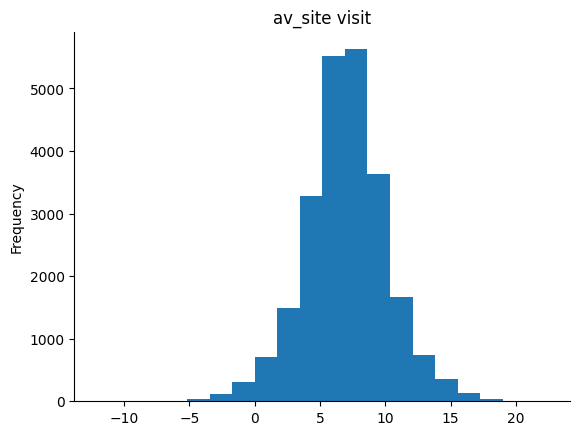

In [4]:
# @title av_site visit

from matplotlib import pyplot as plt
df['av_site visit'].plot(kind='hist', bins=20, title='av_site visit')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [6]:
df[df['av_site visit'] < 0].ab_group.value_counts()

ab_group
B    462
A      6
Name: count, dtype: int64

In [7]:
468/23652 * 100
# некорретных данных меньше 5%, поэтому ими можно пренебречь

1.97869101978691

In [8]:
df.ab_group.value_counts()

ab_group
A    11835
B    11817
Name: count, dtype: int64

In [9]:
462/11817 * 100
# некорретных данных меньше 5%, поэтому они не повлияют на результат

3.9096217314039095

In [10]:
df[df['av_site visit'] == 0]
# нулевых данных нет

,revenue,num_purchases,purchase,ab_group,av_site visit


In [11]:
# Создаем новый датасет, где берем данные больше 0
df_new = df[df['av_site visit'] > 0]

In [12]:
df_new.describe()

,revenue,num_purchases,purchase,av_site visit
count,23184.000000,23184.000000,23184.000000,23184.000000
mean,0.326511,0.043780,0.020704,7.188254
std,9.645839,1.089462,0.142394,2.924011
min,0.000000,0.000000,0.000000,0.008679
25%,0.000000,0.000000,0.000000,5.314379
50%,0.000000,0.000000,0.000000,7.068656
75%,0.000000,0.000000,0.000000,8.910900
max,1303.609284,152.000000,1.000000,22.446822


In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23184 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23184 non-null  float64
 1   num_purchases  23184 non-null  int64  
 2   purchase       23184 non-null  int64  
 3   ab_group       23184 non-null  object 
 4   av_site visit  23184 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ MB


In [14]:
df_new = df_new.astype({'num_purchases':np.uint16})
# сделали замену данных в столбце, чтобы немного разгрузить датасет

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23184 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23184 non-null  float64
 1   num_purchases  23184 non-null  uint16 
 2   purchase       23184 non-null  int64  
 3   ab_group       23184 non-null  object 
 4   av_site visit  23184 non-null  float64
dtypes: float64(2), int64(1), object(1), uint16(1)
memory usage: 950.9+ KB


In [16]:
group_a = df_new[df_new['ab_group'] =='A']
group_b = df_new[df_new['ab_group'] =='B']

In [17]:
group_a.describe()

,revenue,num_purchases,purchase,av_site visit
count,11829.000000,11829.000000,11829.000000,11829.000000
mean,0.404667,0.050723,0.021642,6.980379
std,13.136545,1.467883,0.145517,2.004450
min,0.000000,0.000000,0.000000,0.145466
25%,0.000000,0.000000,0.000000,5.657590
50%,0.000000,0.000000,0.000000,6.984166
75%,0.000000,0.000000,0.000000,8.346243
max,1303.609284,152.000000,1.000000,17.728836


In [18]:
group_b.describe()

,revenue,num_purchases,purchase,av_site visit
count,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.245093,0.036548,0.019727,7.404806
std,3.192299,0.422820,0.139067,3.630412
min,0.000000,0.000000,0.000000,0.008679
25%,0.000000,0.000000,0.000000,4.746728
50%,0.000000,0.000000,0.000000,7.262590
75%,0.000000,0.000000,0.000000,9.889165
max,113.830000,25.000000,1.000000,22.446822


(array([138., 144., 170., 226., 235., 248., 308., 352., 369., 408., 443.,
        456., 475., 528., 551., 539., 509., 506., 514., 484., 467., 439.,
        422., 358., 343., 281., 252., 238., 178., 156., 128., 118.,  81.,
         79.,  62.,  40.,  38.,  17.,  13.,   7.,  11.,   8.,   8.,   1.,
          1.,   3.,   1.,   1.,   0.,   1.]),
 array([8.67869372e-03, 4.57441569e-01, 9.06204445e-01, 1.35496732e+00,
        1.80373020e+00, 2.25249307e+00, 2.70125595e+00, 3.15001882e+00,
        3.59878170e+00, 4.04754458e+00, 4.49630745e+00, 4.94507033e+00,
        5.39383320e+00, 5.84259608e+00, 6.29135895e+00, 6.74012183e+00,
        7.18888471e+00, 7.63764758e+00, 8.08641046e+00, 8.53517333e+00,
        8.98393621e+00, 9.43269908e+00, 9.88146196e+00, 1.03302248e+01,
        1.07789877e+01, 1.12277506e+01, 1.16765135e+01, 1.21252763e+01,
        1.25740392e+01, 1.30228021e+01, 1.34715650e+01, 1.39203278e+01,
        1.43690907e+01, 1.48178536e+01, 1.52666165e+01, 1.57153793e+01,
        1.

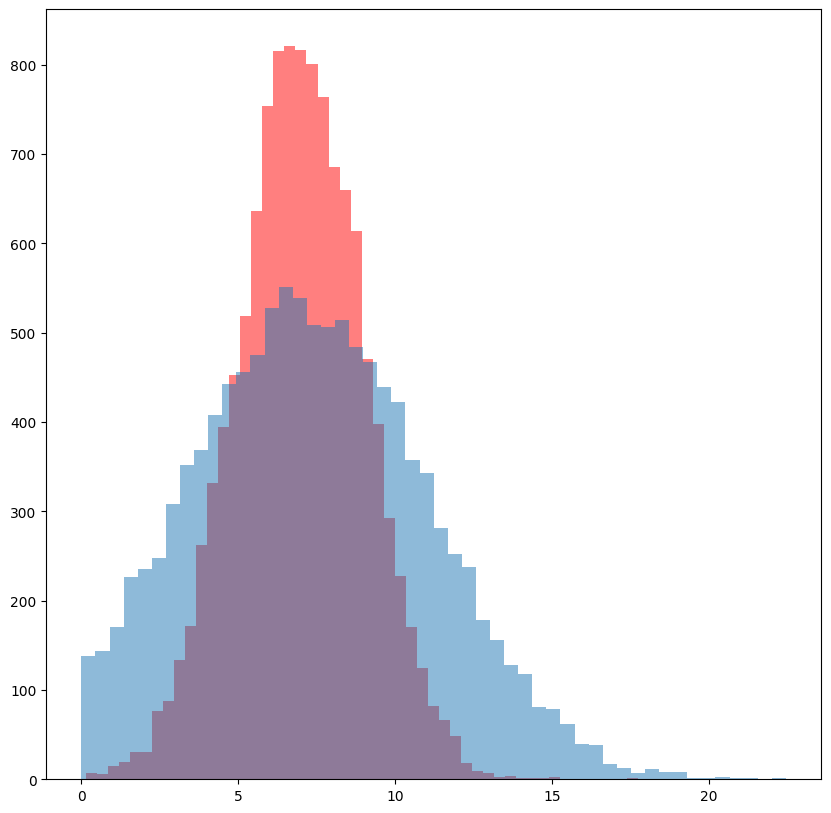

In [19]:
plt.figure(figsize=(10, 10))
control_visit_all = group_a['av_site visit']
test_visit_all = group_b['av_site visit']

plt.hist(control_visit_all, color='r', bins=50, alpha = 0.5)
plt.hist(test_visit_all,  bins=50, alpha = 0.5)

In [20]:
# По графику видно, что нормальное распределение и у нас есть 2 группы - воспользуемся t-тестом для стат значимости
stats.ttest_ind(control_visit_all, test_visit_all, equal_var = False)

TtestResult(statistic=-10.957295422202266, pvalue=7.548128551839559e-28, df=17530.29639618072)

In [21]:
# Т.к. pvalue < 0.05, то есть разница в рассматриваемых группах.

In [22]:
control_visit_all.mean()

6.980379496709522

In [23]:
test_visit_all.mean()

7.404806266947357

In [24]:
k1 = group_a.purchase.sum() # кол-во конверсий в группе А
k2 = group_b.purchase.sum() # кол-во конверсий в группе В
n1 = group_a.shape[0] # кол-во строк (кол-во данных) в группе А
n2 = group_b.shape[0] # кол-во строк (кол-во данных) в группе В

In [25]:
k1,k2,n1,n2

(256, 224, 11829, 11355)

In [26]:
# Решение через хи-квадрат
from statsmodels.stats import proportion
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
                                                        np.array([n1, n2]))

print('Results are ','chisq = %.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq = 1.048, pvalue = 0.306


In [27]:
# Решение через z-параметр, т.к. выборка более 10 000
z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),
                                                   np.array([n1, n2]))
print('Results are ','z_score = %.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score = 1.024, pvalue = 0.306


In [28]:
# Т.к. pvalue > 0.05, то стат значимых различий по данным 'av_site visit' нет

(array([1.1131e+04, 0.0000e+00, 1.5700e+02, 0.0000e+00, 2.9000e+01,
        0.0000e+00, 1.5000e+01, 0.0000e+00, 9.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23

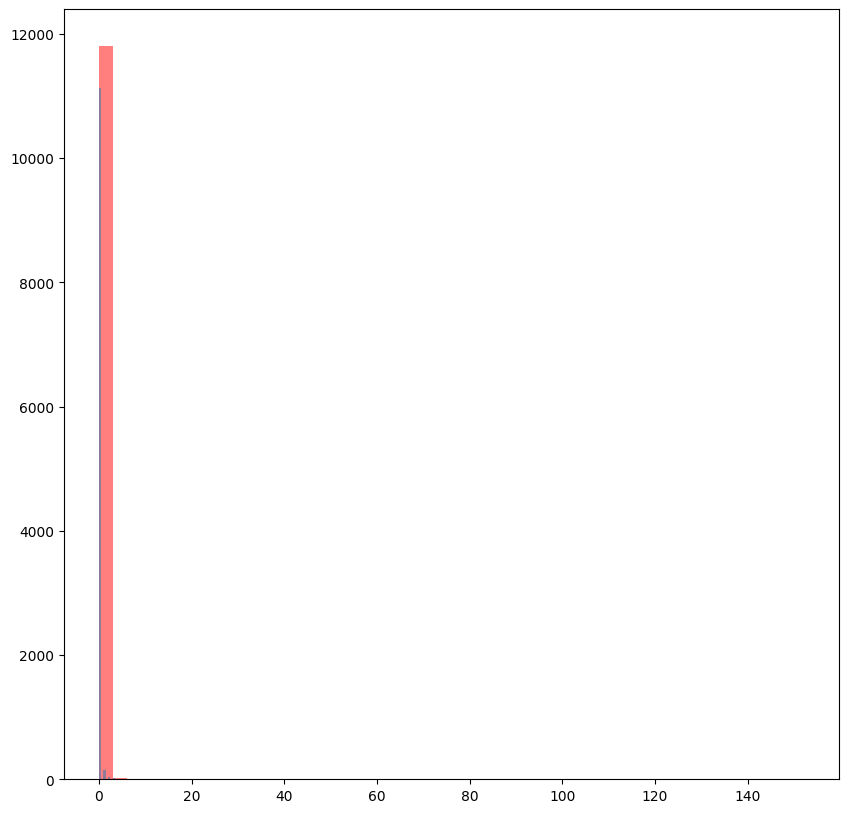

In [29]:
plt.figure(figsize=(10, 10))
control_visit_all = group_a['num_purchases']
test_visit_all = group_b['num_purchases']

plt.hist(control_visit_all, color='r', bins=50, alpha = 0.5)
plt.hist(test_visit_all,  bins=50, alpha = 0.5)

In [30]:
# По графику видно, что распределение не нормальное и у нас есть 2 группы - воспользуемся тестом Манн-Уитни для стат значимости

In [31]:
mw_stats = stats.mannwhitneyu(x = group_a.num_purchases.values, y = group_b.num_purchases.values)

mw_stats

MannwhitneyuResult(statistic=67287358.5, pvalue=0.3075297408628419)

In [32]:
# Т.к. pvalue > 0.05, то стат значимых различий по данным 'num_purchases' нет

In [33]:
# Т.к. по графику конверсий распределение не нормальное, то и по кол-ву покупок тоже будет распределение не нормальное, поэтому также воспользуемся тестом Манн-Уитни
mw_stats = stats.mannwhitneyu(x = group_a.revenue.values, y = group_b.revenue.values)

mw_stats

MannwhitneyuResult(statistic=67287553.0, pvalue=0.306808963067974)

In [34]:
# Т.к. pvalue > 0.05, то стат значимых различий по данным 'revenue' тоже нет

(array([79., 38., 29.,  7., 11.,  8.,  4.,  1.,  4.,  3.,  2.,  7.,  0.,
         7.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,
         1.,  2.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.259373  ,   2.53078554,   4.80219808,   7.07361062,
          9.34502316,  11.6164357 ,  13.88784824,  16.15926078,
         18.43067332,  20.70208586,  22.9734984 ,  25.24491094,
         27.51632348,  29.78773602,  32.05914856,  34.3305611 ,
         36.60197364,  38.87338618,  41.14479872,  43.41621126,
         45.6876238 ,  47.95903634,  50.23044888,  52.50186142,
         54.77327396,  57.0446865 ,  59.31609904,  61.58751158,
         63.85892412,  66.13033666,  68.4017492 ,  70.67316174,
         72.94457428,  75.21598682,  77.48739936,  79.7588119 ,
         82.03022444,  84.30163698,  86.57304952,  88.84446206,
         91.1158746 ,  93.38728714,  95.65869968,  97.93011222,
        100.

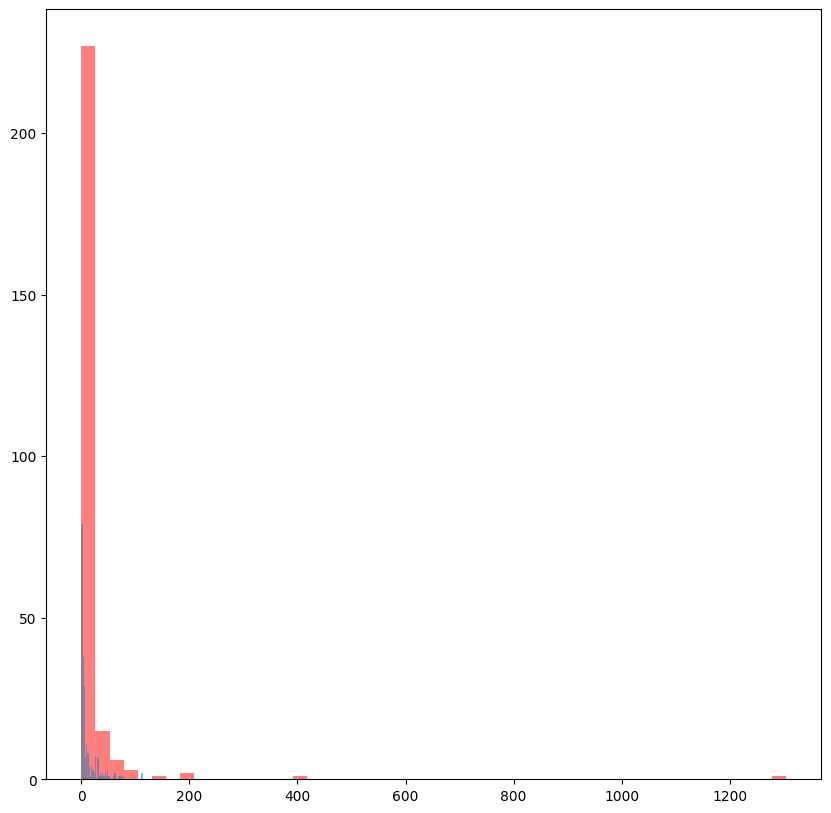

In [35]:
# Решение для тех, кто уже покупали
plt.figure(figsize=(10, 10))
control_visit_all = group_a.query('purchase == 1')['revenue']
test_visit_all = group_b.query('purchase == 1')['revenue']

plt.hist(control_visit_all, color='r', bins=50, alpha = 0.5)
plt.hist(test_visit_all,  bins=50, alpha = 0.5)

In [36]:
# По графику видно, что распределение не нормальное и у нас есть 2 группы - воспользуемся тестом Манн-Уитни для стат значимости
mw_stats = stats.mannwhitneyu(x = group_a.query('purchase == 1')['revenue'].values, y = group_b.query('purchase == 1')['revenue'].values)

mw_stats

MannwhitneyuResult(statistic=28485.5, pvalue=0.902319344132039)

In [37]:
# Т.к. pvalue > 0.05, то стат значимых различий по данным 'revenue' для тех, кто уже купили - тоже нет

Общий вывод: стат значимых различий по группам нет, кроме того, как в версии B - только выше среднее время визита и есть некорректные данные по времени, которыми принебрегли (т.к. таких данных менее 5% от общих данных группы), и поэтому вариант В - не применяем, и оставляем текущий вариант А.